# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each cit
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vershino-darasunskiy
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | puerto baquerizo moreno
Processing Record 6 of Set 1 | chinde
Processing Record 7 of Set 1 | arraias
Processing Record 8 of Set 1 | santiago
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | salta
Processing Record 14 of Set 1 | nagqu
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | taupo
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | grand falls-windsor
Processing Record

Next box is for testing, delete later

In [83]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
city_weather


{'coord': {'lon': -27.0667, 'lat': 38.7333},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 293.29,
  'feels_like': 293.37,
  'temp_min': 293.01,
  'temp_max': 293.29,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.19, 'deg': 211, 'gust': 7.64},
 'clouds': {'all': 20},
 'dt': 1699734771,
 'sys': {'type': 1,
  'id': 6895,
  'country': 'PT',
  'sunrise': 1699691147,
  'sunset': 1699727931},
 'timezone': -3600,
 'id': 3372760,
 'name': 'Praia da Vitória',
 'cod': 200}

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vershino-darasunskiy,52.3500,115.5167,-16.72,93,17,1.64,RU,1699734065
1,edinburgh of the seven seas,-37.0676,-12.3116,14.76,90,87,9.62,SH,1699733791
2,blackmans bay,-43.0167,147.3167,10.96,69,100,1.34,AU,1699734067
3,vilyuchinsk,52.9306,158.4028,2.15,73,59,19.66,RU,1699734068
4,puerto baquerizo moreno,-0.9000,-89.6000,28.55,61,40,6.69,EC,1699734069


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vershino-darasunskiy,52.3500,115.5167,-16.72,93,17,1.64,RU,1699734065
1,edinburgh of the seven seas,-37.0676,-12.3116,14.76,90,87,9.62,SH,1699733791
2,blackmans bay,-43.0167,147.3167,10.96,69,100,1.34,AU,1699734067
3,vilyuchinsk,52.9306,158.4028,2.15,73,59,19.66,RU,1699734068
4,puerto baquerizo moreno,-0.9000,-89.6000,28.55,61,40,6.69,EC,1699734069


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

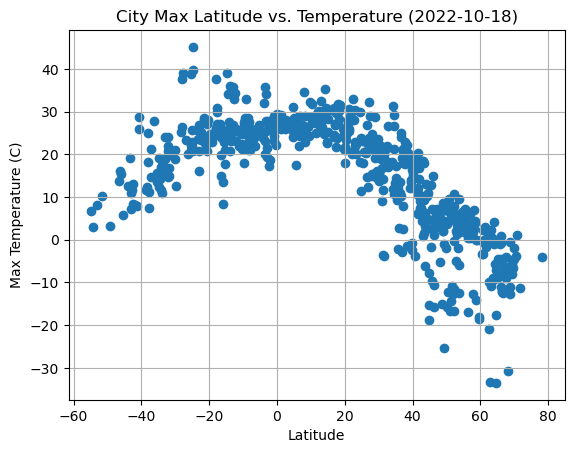

In [88]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

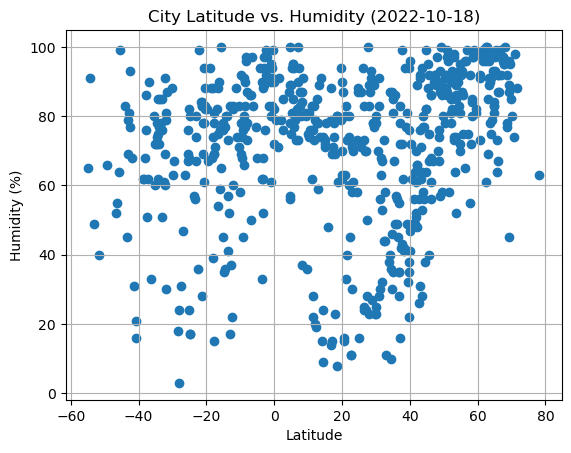

In [89]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

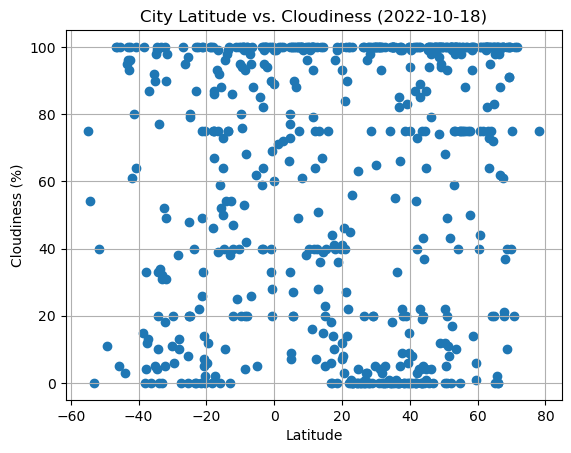

In [90]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

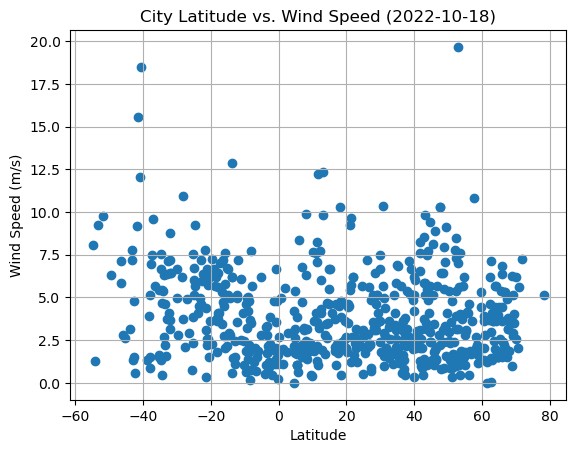

In [91]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label, coordinates):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Visualize the plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, coordinates,fontsize=15,color="red")
    print(f'The r-value is: {rvalue ** 2}')
    plt.show()



In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vershino-darasunskiy,52.3500,115.5167,-16.72,93,17,1.64,RU,1699734065
3,vilyuchinsk,52.9306,158.4028,2.15,73,59,19.66,RU,1699734068
5,chinde,26.8418,88.0763,12.38,70,1,2.26,NP,1699734069
8,college,64.8569,-147.8028,-9.03,81,100,1.54,US,1699734072
9,kodiak,57.7900,-152.4072,1.73,55,75,10.80,US,1699734073


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,14.76,90,87,9.62,SH,1699733791
2,blackmans bay,-43.0167,147.3167,10.96,69,100,1.34,AU,1699734067
4,puerto baquerizo moreno,-0.9000,-89.6000,28.55,61,40,6.69,EC,1699734069
6,arraias,-12.9288,-46.9437,35.74,17,38,1.09,BR,1699734070
7,santiago,-33.4569,-70.6483,17.00,78,100,4.63,CL,1699733467


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.730392276196946


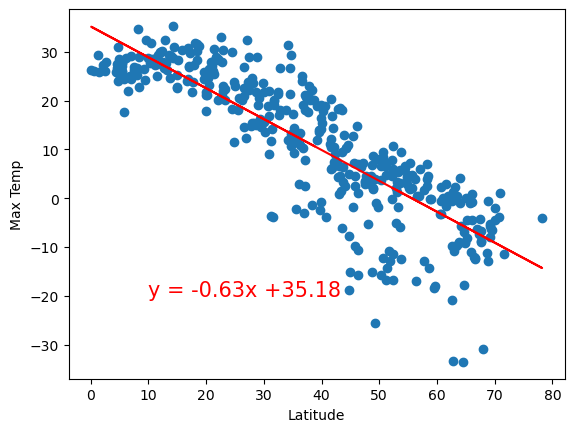

In [103]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label = "Max Temp"
coordinates = (10,-20)

linear_regression_plot(x_values, y_values, y_label, coordinates)


The r-value is: 0.35847143715204755


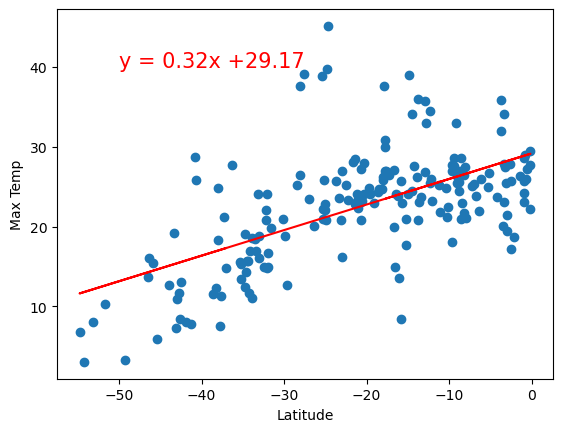

In [104]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label = "Max Temp"
coordinates = (-50,40)

linear_regression_plot(x_values, y_values, y_label, coordinates)


**Discussion about the linear relationship:** 

There is a negative correlation between Latitude and Max Temperature in the northern hemisphere, meaning that the further north you go, or the further you get from the equator, the lower the maximum temperature. This is why countries like Canada and those in northern Europe have mild temperatures all year round. For the southern hemisphere, it is the same. The further south you go, the colder it will be due to the positive relationship as displayed in the graph. The max temperature near the equator is significantly higher than that of the south of Chile, for example.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08950467121388336


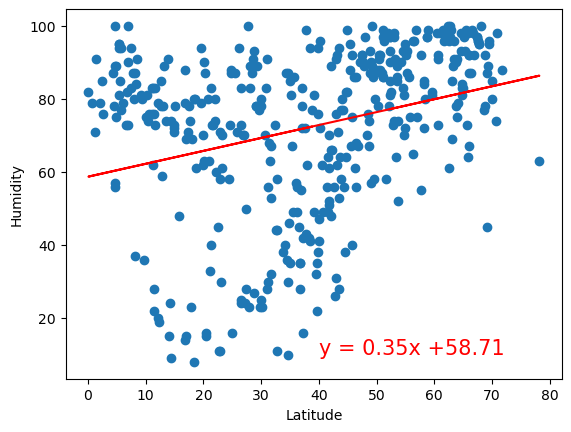

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "Humidity"
coordinates = (40,10)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.06087212878200788


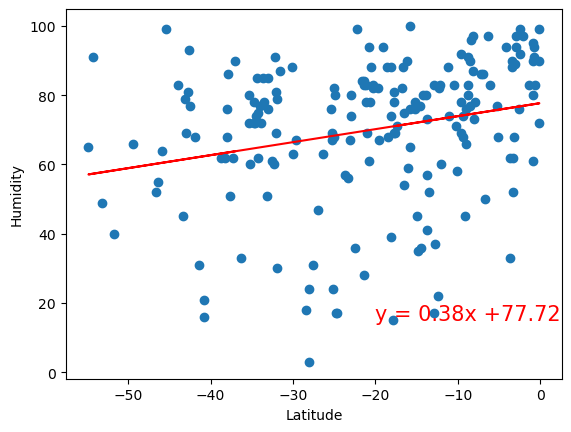

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "Humidity"
coordinates = (-20, 15)

linear_regression_plot(x_values, y_values, y_label, coordinates)


**Discussion about the linear relationship:** 
There is a moderate positive relationship between latitude and humidity for both the northern and southern hemispher, but what this graph does not take into account is geographical data such as proximity to bodies of water, elevation, etc.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016620413738311454


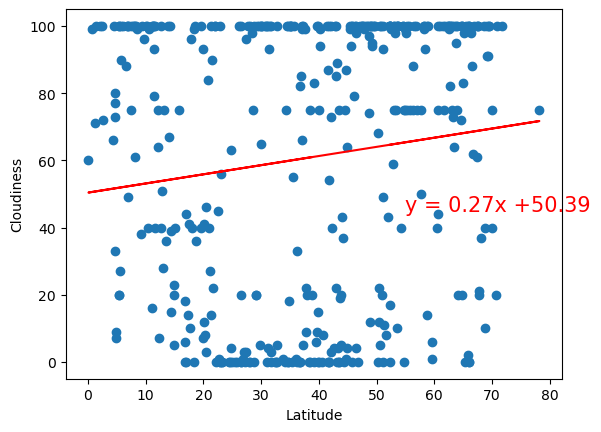

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
coordinates = (55,45)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.042265241220714275


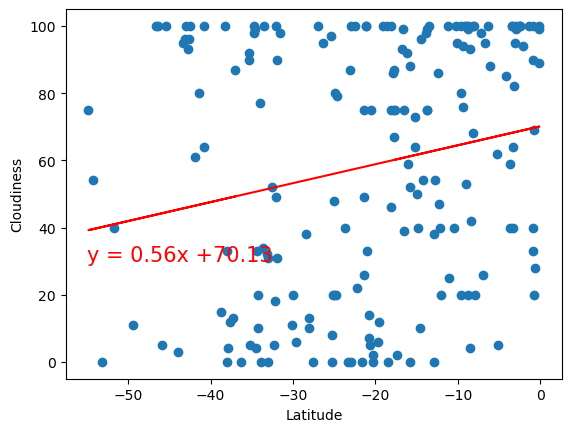

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
coordinates = (-55,30)

linear_regression_plot(x_values, y_values, y_label, coordinates)

**Discussion about the linear relationship:** 
Although there is a positive linear regression for latitude and cloudiness in both the northern and southern hemisphere, the scatter plot points indicate that there may be variability in the data and that the relationship between cloudiness and latitude might not be strictly linear. There might be other variables influencing the positive regression line and various outliers.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 4.828442300522752e-06


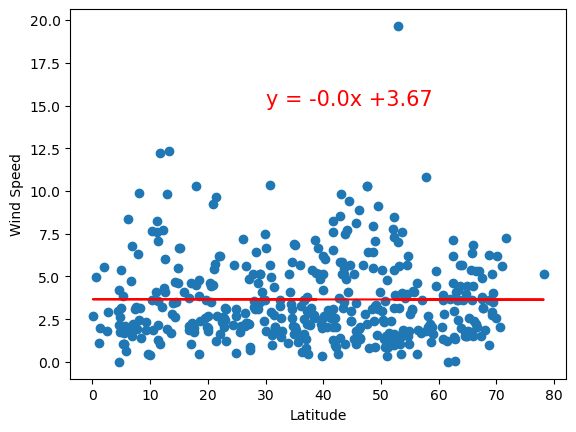

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
coordinates = (30,15)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.14580995259041213


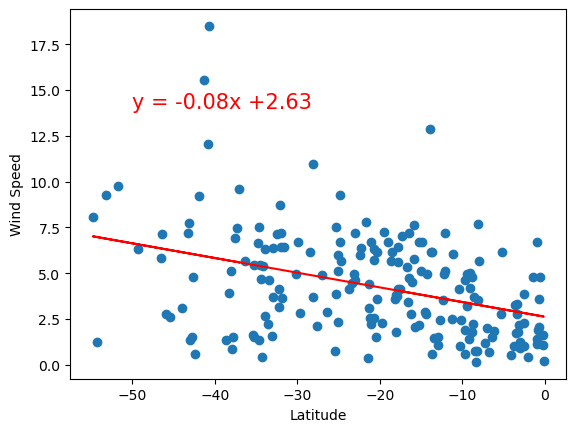

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
coordinates = (-50,14)

linear_regression_plot(x_values, y_values, y_label, coordinates)

**Discussion about the linear relationship:** 
The linear regression line for the northern hemisphere is almost flat, indicating that there is no corelation between latitude and windspeed, but the southern hemispher is sloping downwards, which shows that there may be a correlation between the two. According to the linear regression representing the southern hemisphere, the closer you get to the equator, the less wind speed there may be. However, this plot does not indicate outlying variables or factors that might also affect windspeed such as geographical features, moutain ranges, etc.